In [1]:
import tensorflow as tf

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [7]:
train_dir = "images/train"
validation_dir = "images/validation"

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [9]:
# image count

num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_valid = len(os.listdir(validation_cats_dir))
num_dogs_valid = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_valid = num_cats_valid + num_dogs_valid

In [11]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_valid)
print('total validation dog images:', num_dogs_valid)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_valid)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [12]:
batch_size = 128
epochs = 15
HEIGHT = 150
WIDTH = 150

In [16]:
train_image_generator = ImageDataGenerator(rescale=1./255)
valid_image_generator = ImageDataGenerator(rescale=1./255)

In [17]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size, directory=train_dir, shuffle=True, target_size=(HEIGHT, WIDTH), class_mode='binary')
valid_data_gen = valid_image_generator.flow_from_directory(batch_size=batch_size, directory=validation_dir, target_size=(HEIGHT, WIDTH), class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [18]:
# visualize
sample_training_images, _ = next(train_data_gen)

In [19]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

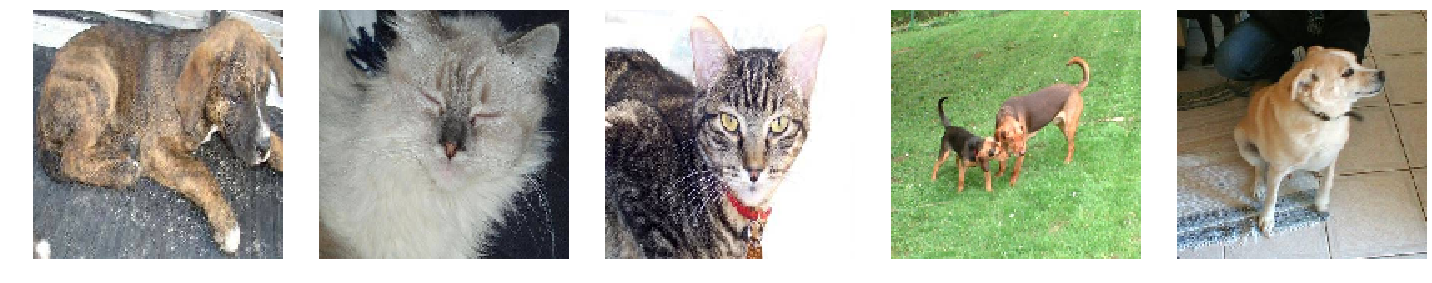

In [20]:
plotImages(sample_training_images[:5])

In [21]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(HEIGHT, WIDTH, 3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [22]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 43808)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               22430208  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5

In [ ]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train,
    epochs=epochs,
    validation_data=valid_data_gen,
    validation_steps=total_valid
)

Epoch 1/15
1503/2000 [=====================>........] - ETA: 23:28 - loss: 0.0581 - accuracy: 0.9748